# **IRIS FLOWER CLASSIFICATION**
One of the most well-known multivariate data sets used to test different machine learning algorithms is the Iris flower data set, often known as Fisher's Iris data set.The three species of iris flower—setosa, versicolor, and virginica—differ in terms of their size. Assume for a moment that you have the measurements of the iris flowers according to their species. Our objective at this point is to build a machine learning model that can categorise

In [5]:
#Importing necessary packages
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics
import warnings
warnings.filterwarnings('ignore')
#SKLEARN#
# preprocessing technique in scikit-learn that scales the features of a dataset to have zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
# preprocessing technique in scikit-learn that converts categorical variables into numerical values using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
# function in scikit-learn that splits a dataset into training and testing sets for machine learning model evaluation.
from sklearn.model_selection import train_test_split
# method in scikit-learn for hyperparameter tuning that performs randomized search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV
# method in scikit-learn for hyperparameter tuning that performs exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
# function in scikit-learn that performs k-fold cross-validation for model evaluation, returning an array of scores for each fold.
from sklearn.model_selection import cross_val_score
# linear regression model in scikit-learn that predicts the target variable based on linear relationship between input features and target.
from sklearn.linear_model import LinearRegression
# it is a linear regression model in scikit-learn that performs L2 regularization to prevent overfitting.
from sklearn.linear_model import Ridge
# a linear regression model in scikit-learn that performs L1 regularization to prevent overfitting and feature selection.
from sklearn.linear_model import Lasso
#  module in scikit-learn that provides various evaluation metrics for model performance, such as accuracy, precision, recall, and F1-score.
from sklearn import metrics
# metric in scikit-learn that calculates the coefficient of determination (R2) to evaluate the goodness-of-fit of a regression model.
from sklearn.metrics import r2_score
# it is a metric in scikit-learn that calculates the mean squared error (MSE) between predicted and actual values to evaluate the performance of a regression model.
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Load Dataset
iris = pd.read_csv('/content/drive/MyDrive/Iris.csv', header= 0,encoding= 'unicode_escape')


In [8]:
# removing unnecessary column
iris.drop(columns=["Id"],inplace=True)

In [9]:
#info of dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#Summary statistics of Iris dataset
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#To get no. of rows and columns in the dataset
iris.shape

(150, 5)

In [12]:
# Dropping duplicate values if any present in our dataframe meanwhile retaining the first value
iris=iris.drop_duplicates(keep='first')

In [13]:
# Dataset Duplicate Value Count
iris.duplicated().sum()

0

In [14]:
# Missing Values/Null Values Count
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

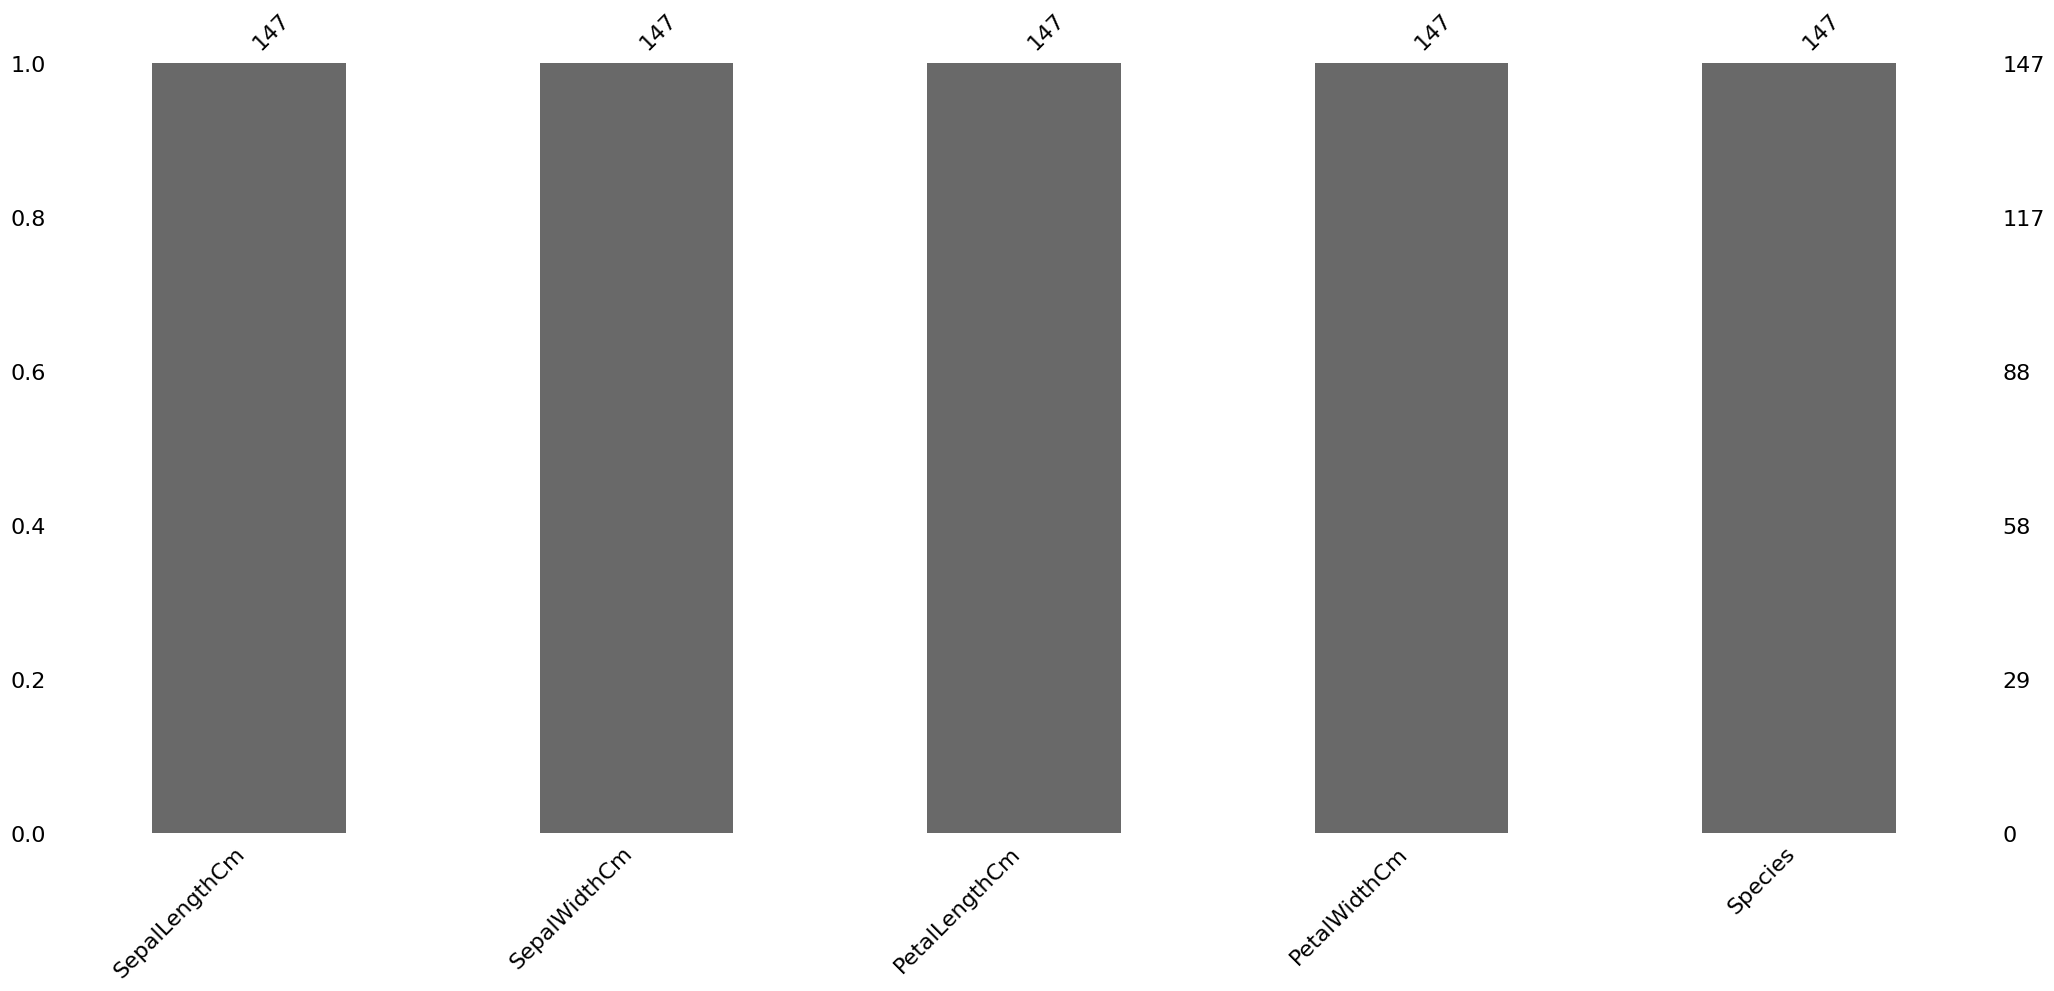

In [15]:
# Let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(iris);

In [16]:
# Check Unique Values for each variable.
def unique_values(df):
    for col in df.columns:
        unique_count = df[col].nunique()
        a=print(f"COLUMN NAME ({col}): {unique_count} unique values")
    return a
unique_values(iris)

COLUMN NAME (SepalLengthCm): 35 unique values
COLUMN NAME (SepalWidthCm): 23 unique values
COLUMN NAME (PetalLengthCm): 43 unique values
COLUMN NAME (PetalWidthCm): 22 unique values
COLUMN NAME (Species): 3 unique values


# **Data Visualization**

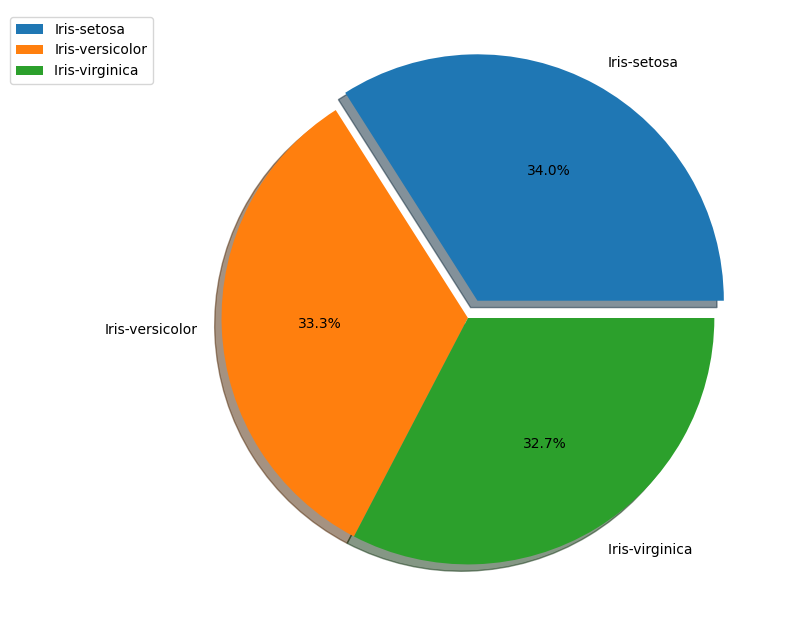

In [17]:
# constructing a piechart to see the count of each species
plt.rcParams['figure.figsize']=(8,8)
plt.pie(iris['Species'].value_counts(),labels=['Iris-setosa','Iris-versicolor','Iris-virginica '],explode= [0.08, 0, 0],autopct='%1.1f%%',shadow=True);
plt.legend(bbox_to_anchor=(0,1));

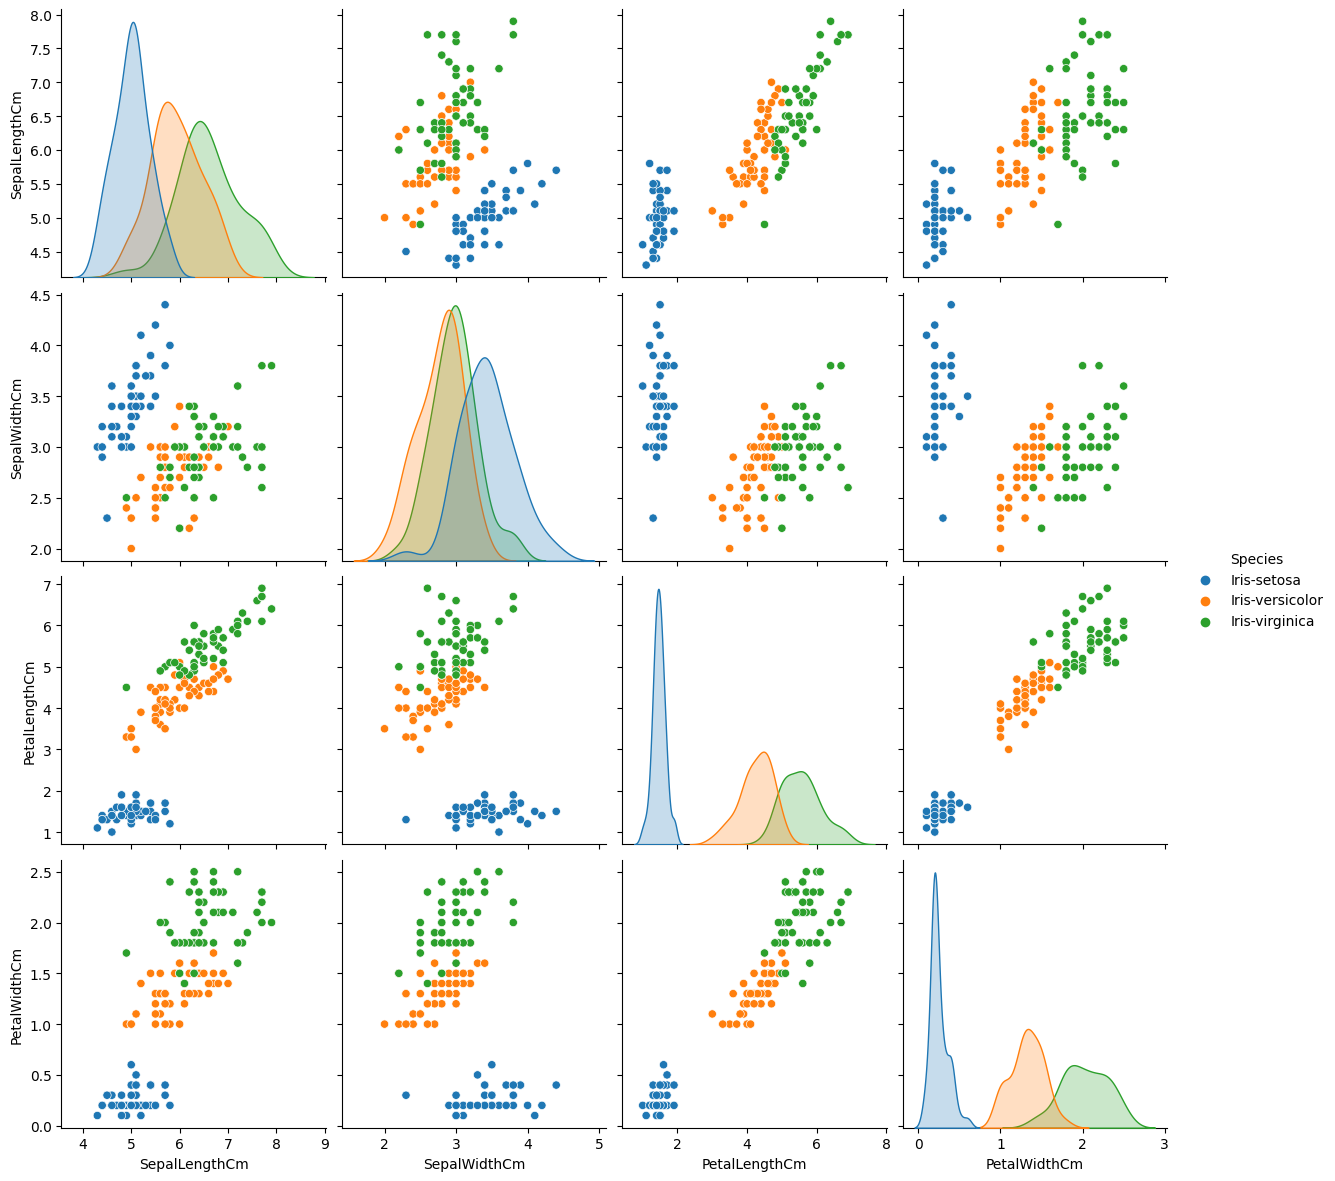

In [18]:
#Pairplot which shows the pair-wise relation between every attributes
sns.pairplot(iris,hue='Species', height=3);

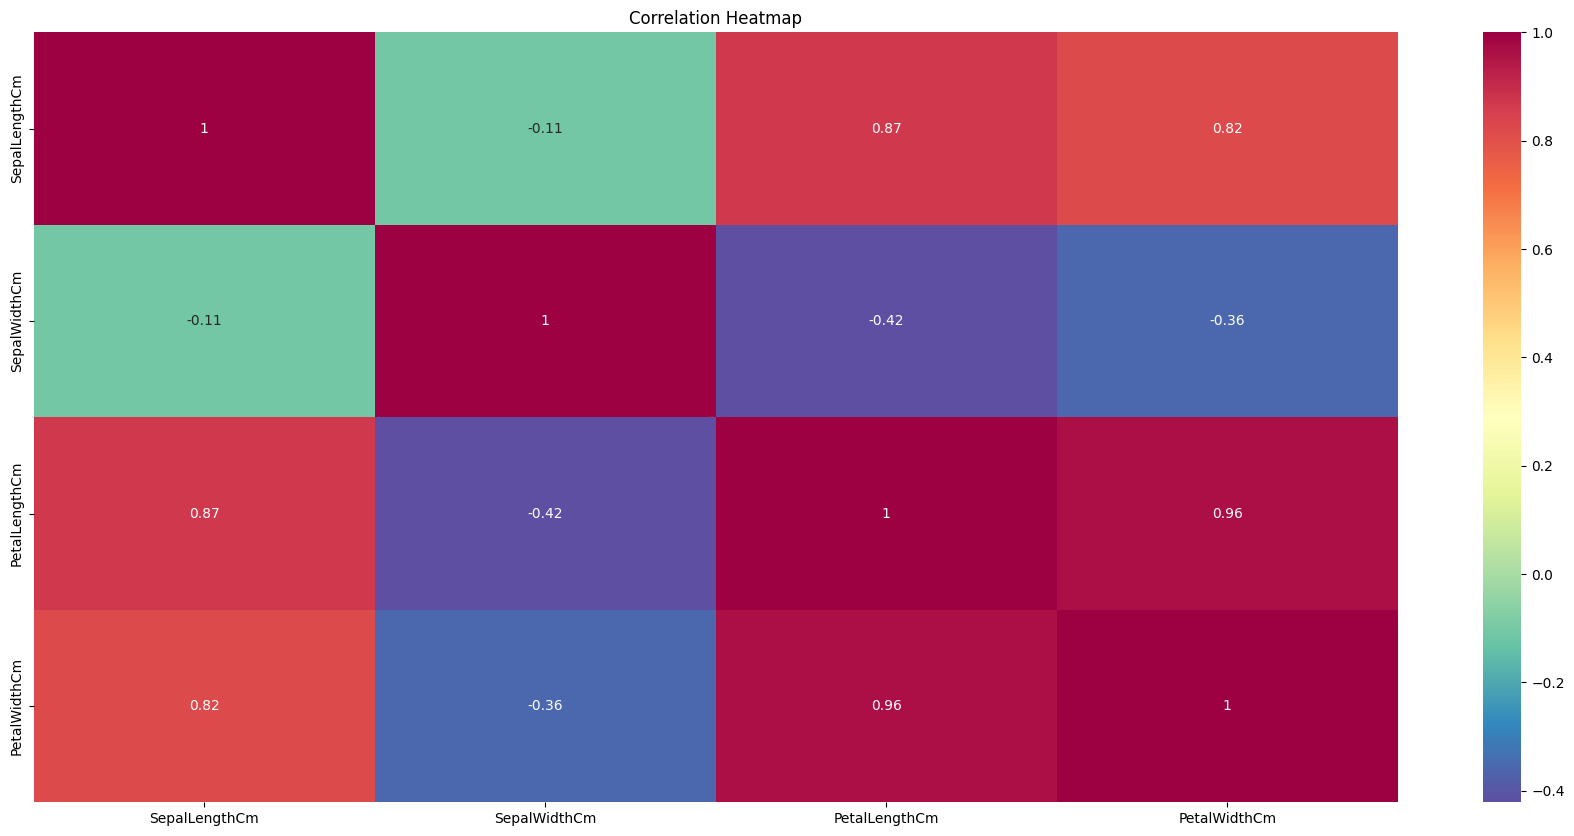

In [19]:
# plotting heatmap using seaborn to establish relations between features
plt.figure(figsize=(22,10))
plt.title("Correlation Heatmap")
sns.heatmap(iris.corr(),annot=True,cmap='Spectral_r');

# **Model Building**

In [28]:
# splitting data into train and test set
x =  iris.drop('Species',axis=1)
y = iris['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state =42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((117, 4), (30, 4), (117,), (30,))

# **Random Forest with RandomSearchCV**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [35]:
# Define the hyperparameter grid for RandomSearchCV
param_grid = {
     'n_estimators': np.arange(50, 201, 10),
    'max_depth': [None] + list(np.arange(10, 21, 2)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5)
}
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

In [36]:
# Performing RandomSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=rf_classifier, param_distributions=param_grid,
    n_iter=50, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 12, 14, 16, 18,
                                                      20],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200])},
                   random_state=42)

In [37]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

In [45]:
# Evaluating the model
y_pred = best_rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 16}
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Accuracy Score: 93.33333333333333


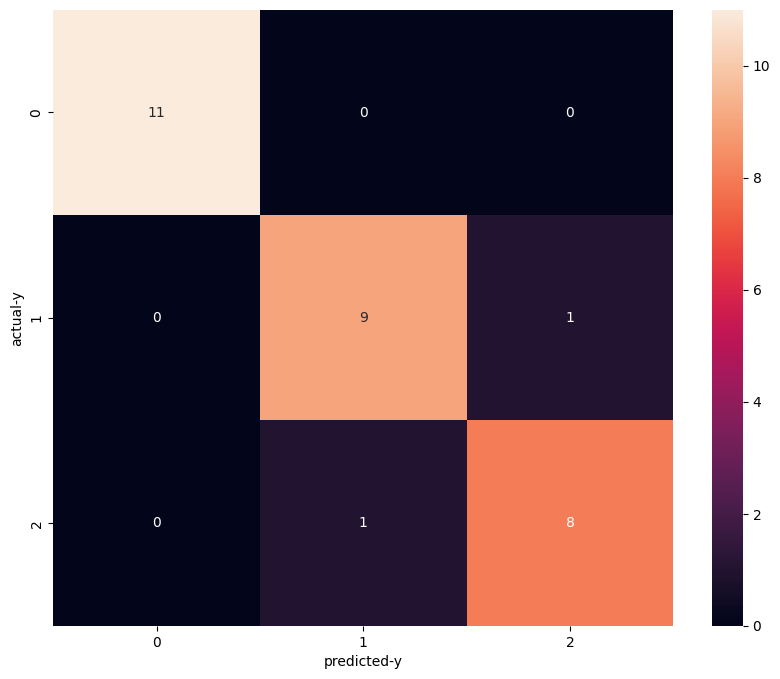

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y')
plt.show()

In [80]:
# Checking
y_predict_rf=best_rf_model.predict([[5.9,3.0,5.1,1.8]])
print(*y_predict_rf)

Iris-virginica


# **XGboost with RandomizedSearchCV**

In [49]:
import xgboost as xgb

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(50, 201, 10),
    'max_depth': np.arange(3, 11),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': np.arange(1, 6),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.01, 0.1, 1, 10]
}

# Perform RandomizedSearchCV to find the best hyperparameters
random_search_cv = RandomizedSearchCV(
    estimator=xgb_classifier, param_distributions=param_distributions,
    n_iter=50, cv=5, n_jobs=-1, random_state=42
)


In [59]:
# Convert class labels to integers using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [60]:
# train test split for XG boost
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [62]:
# using random search cv
random_search_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_child_weight': array([1, 2, 3, 4, 5]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200]),
                                        'reg_alpha': [0, 0.01, 0.1, 1, 10],
                                        'reg_lambda': [0, 0.01, 0.1, 1, 10],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42)

In [64]:
# finding out the best parameter
best_params_xg = random_search_cv.best_params_
best_xgb_model_xg = random_search_cv.best_estimator_

In [66]:
# Evaluating the model
Y_pred = best_xgb_model_xg.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Best hyperparameters:", best_params_xg)
print("Test set accuracy:", accuracy)

Best hyperparameters: {'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0, 'n_estimators': 170, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}
Test set accuracy: 0.9333333333333333


# **Logistic Regression with GridSearchCV**

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
log_reg = LogisticRegression()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search_lg = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search_lg.fit(X_train, Y_train)

# Get the best hyperparameters and the best model
best_params_lg = grid_search_lg.best_params_
best_log_reg_model = grid_search_lg.best_estimator_


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Best hyperparameters: {'C': 1, 'solver': 'sag'}
Test set accuracy: 0.9666666666666667


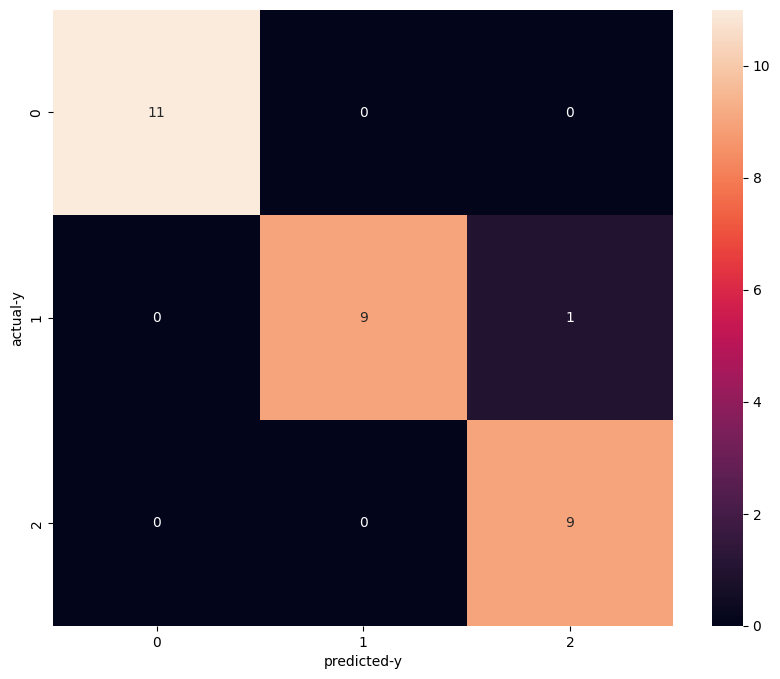

In [76]:
# Evaluating the model
y_pred_lg = best_log_reg_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_lg)
print(classification_report(Y_test,y_pred_lg))
print("Best hyperparameters:", best_params_lg)
print("Test set accuracy:", accuracy)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(Y_test, y_pred_lg),annot=True)
plt.xlabel('predicted-y')
plt.ylabel('actual-y');


In [81]:
#Checking predictions
#0-iris-setosa
#1-iris-versicolor
#2-iris-verginica
y_predict_lg=best_log_reg_model.predict([[5.9,3.0,5.1,1.8]])
print(*y_predict_lg)

2
